In [37]:
from __future__ import division 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('training_data.csv')
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('parcelid', axis=1)
df=df.drop('propertycountylandusecode', axis=1)
df=df.drop('propertyzoningdesc', axis=1)

In [3]:
for x in df.columns:
    if len(df[x].dropna(axis=0))!=len(df[x]):
        df[x+'_isnull']=df[x].apply(lambda k: int(k != k))

In [4]:
df=df.drop('taxdelinquencyflag', axis=1)


In [5]:
df=df.fillna(0)

In [6]:
df['hashottuborspa']=df['hashottuborspa'].apply(int)
df['fireplaceflag']=df['fireplaceflag'].apply(int)

In [7]:
def numdays(date):
    return 365*(int(date[:4])-2016)+30*(int(date[5:7])-1)+int(date[8:])

In [8]:
df['transactiondate']=df['transactiondate'].apply(numdays)

In [9]:
Y=df['logerror']
X=df.drop('logerror', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

1 0.000355995334193
2 0.000680613150244
3 0.000981833214047
4 0.00125887435743
5 0.00151289369276
6 0.00185166072908
7 0.00214669303304
8 0.00242533228718
9 0.00257493901221
10 0.00276064185828
11 0.002925369094
12 0.00313862823183
13 0.00328707479503
14 0.00339903865319
15 0.00352530060328


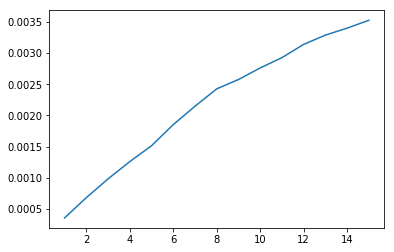

In [11]:
x_axis = np.linspace(1,15,15)
y_axis=[]
for x in x_axis:
    model=GradientBoostingRegressor(learning_rate=0.004, n_estimators=int(10*x), 
                                    max_depth=3)
    model.fit(X_train, y_train)
    s=model.score(X_test,y_test)
    y_axis.append(s)
    print int(x), s
y_axis=np.array(y_axis)
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
plt.show()

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0260           0.0000           15.73m
         2           0.0264           0.0000           14.82m
         3           0.0256           0.0000           14.64m
         4           0.0231           0.0000           14.45m
         5           0.0250           0.0000           14.65m
         6           0.0252           0.0000           14.63m
         7           0.0263           0.0000           15.03m
         8           0.0257          -0.0000           15.32m
         9           0.0256           0.0000           15.36m
        10           0.0259           0.0000           15.52m
        20           0.0264           0.0000           15.77m
        30           0.0258           0.0000           15.99m
        40           0.0263           0.0000           15.95m
        50           0.0255           0.0000           15.78m
        60           0.0279           0.0000           15.88m
       

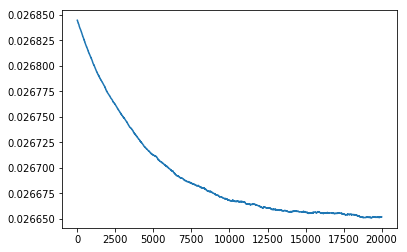

In [39]:
N=20000
L=8/N
model=GradientBoostingRegressor(learning_rate=L, n_estimators=N, max_depth=4, subsample=0.5,
                                max_features='sqrt', verbose=1)
model.fit(X_train, y_train)
print model.score(X_test,y_test)

test_score = np.zeros(N)

for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)

x_axis=np.linspace(1,N,N)
y_axis=np.array(test_score)
plt.plot(x_axis, y_axis)
plt.show()


In [41]:
import pickle
from sklearn.externals import joblib

In [42]:
joblib.dump(model, 'fit_model.pkl')

['fit_model.pkl']